In [627]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
# Once the code is finished, it will be added to a2eipy (python library). 
# Hence, this block will eventually be thrown out from this Jupyter Notebook.

%load_ext autoreload
%run cooking_session.py
%run plot_resources.py
%run on_grid_resources.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Packages
from pylab import rcParams

In [3]:
# Source files
df_info = pd.read_csv('files/data_look_up_table.csv', sep=',' , index_col=False)  # Lookup list On-grid pilot
df_extended_info = pd.read_csv('files/on_grid_EPC_pilot_test.csv', sep=',' , index_col=False) # Survey
df_wab = pd.read_csv('files/whatsapp_data_fetched_on_Jan_12.csv', sep=',' , index_col=False) # WAB data
df_raw = pd.read_csv('files/ongridpilot_jan19.csv', sep=',' , index_col=False) # SM data On-grid pilot

In [12]:
# Overview of parameters that are possible to adjust
default_params = {'time_resolution': 5,
         't_between': 15,
         'energy_error_margin': 0.04,
         'min_size_of_spikes': 1,
         'minimum_energy_per_cooking_event': 0.05,
         'power_mean_min': 0.05,
         'minimum_event_current': 0.5,
         'max_cooking_time':300,
         'time_resolution': 5,
         'minimum_active_load': 0.15,
         'power_capacity': 1}

# Outputs
df_epc = preprocess_epc_data(df_raw, time_resolution=1, 
                             energy_error_margin=0,
                             minimum_energy_per_cooking_event=0.04,
                            minimum_event_current = 0,
                            minimum_active_load=0.05)

df_epc = combine_list_sm_data(df_epc, df_info)
# Only include meters that is part of household in tz_cooking_pilot_2
df_epc = df_epc[df_epc.name.isnull()==False]

# Outputs
df_only_events = create_only_event_df(df_epc)
df_only_events = combine_list_sm_data(df_only_events, df_info)
df_only_events.reset_index(inplace=True)
df_epc = clean_data_set(df_epc)

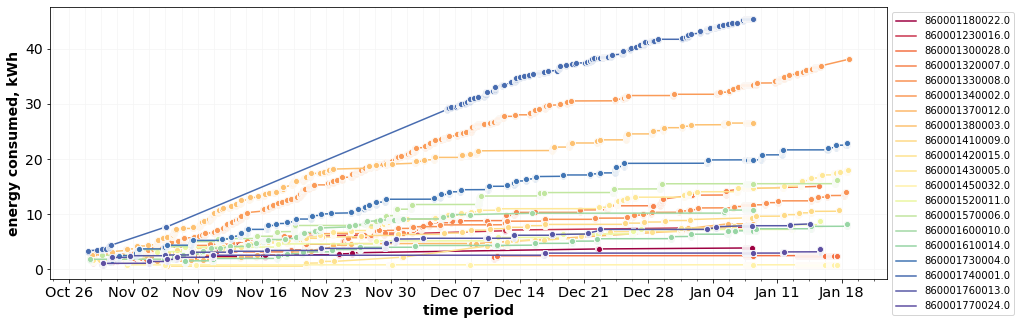

In [13]:
%matplotlib inline
plot_on_grid_pilot(df_epc)

In [14]:
df_only_events.describe()

,meter_number,energy,event_energy,power,cooking_time,current,no_recordings,id,power_mean,cooking_cost,event_count,sm_energy_total
count,7.040000e+02,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,8.600015e+07,12.596222,0.243821,0.720934,21.566761,4.540099,10.724432,470.348011,0.759334,24.382102,352.500000,19.824796
std,1.665391e+01,10.626110,0.142141,0.295737,13.867821,1.411650,10.879826,11.137939,0.278342,14.214082,203.371581,11.878003
min,8.600012e+07,0.740000,0.040000,0.000000,3.000000,0.000000,2.000000,460.000000,0.080000,4.000000,1.000000,0.000000
25%,8.600013e+07,4.662500,0.149167,0.575317,11.000000,3.916000,4.000000,462.000000,0.600000,14.916667,176.750000,9.060000
50%,8.600014e+07,8.740000,0.230000,0.711165,20.000000,4.043500,7.000000,465.000000,0.761905,23.000000,352.500000,16.440000
75%,8.600016e+07,17.097500,0.300000,0.823967,27.000000,4.214250,12.250000,476.000000,0.857143,30.000000,528.250000,34.340000
max,8.600018e+07,45.290000,1.260000,1.869332,130.000000,8.184000,92.000000,505.000000,1.800000,126.000000,704.000000,41.990000


In [15]:
print('No. of cooking events: '+str(df_only_events.event_count.nunique()))

No. of cooking events: 704


In [18]:
df_epc.reset_index(inplace=True)

In [19]:
device_stats(df_epc, df_only_events)

,event_count,no_of_meters,total_event_energy,max_current,events/meter,energy/meter,average_event_energy,average_cooking_time
device,,,,,,,,
EPC,506,10,129.020000,4.404,50.6,12.902000,0.254980,23.562846
Hot plate,4,2,0.790000,6.151,2.0,0.395000,0.197500,26.000000
Kettle,112,4,21.436667,8.184,28.0,5.359167,0.191399,10.332143
Rice cooker,82,4,20.403333,4.291,20.5,5.100833,0.248821,24.378049


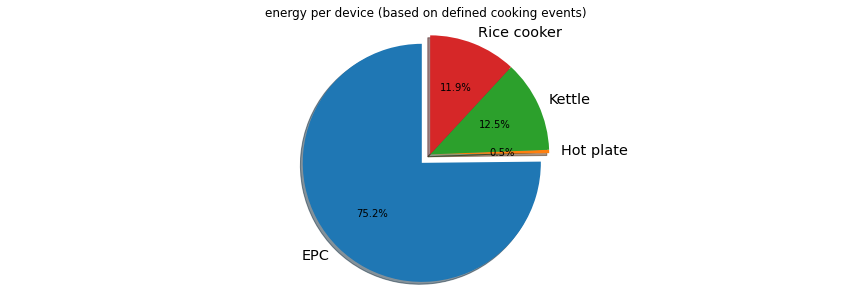

In [20]:
title = 'energy per device (based on defined cooking events)'
sizes = df_only_events.groupby([df_only_events.device]).agg({'event_energy':'sum'}).event_energy
pie_chart(df_only_events, sizes, title, None)

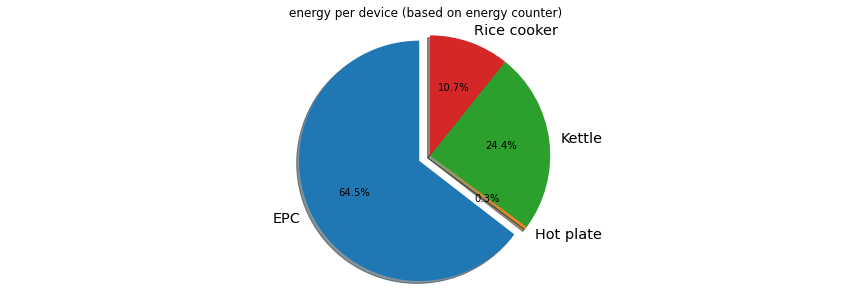

In [21]:
sizes = df_epc.groupby('meter_number').first().groupby('device').agg({'sm_energy_total':'sum'}).sm_energy_total
title = 'energy per device (based on energy counter)'
pie_chart(df_epc, sizes, title,save_path='images/pie_energy_counter.png')

In [22]:
df_only_events_name = df_only_events.groupby('name').agg({'event_energy':'mean', 'cooking_time':'mean','event_count':'nunique', 'device':'unique'})
df_only_events_name.rename(
    columns={'event_energy': 'average_event_energy',
        'cooking_time': 'average_cooking_time'},
    inplace=True)
df_only_events_name

,average_event_energy,average_cooking_time,event_count,device
name,,,,
Abraham Molel,0.232312,20.497297,111,"[EPC, Rice cooker, Kettle]"
Faudhia Hemed,0.219598,18.870690,116,"[EPC, Hot plate, Kettle]"
Happyness Wilson Madulu,0.251754,18.385965,57,[EPC]
Jackline Anthony,0.255036,19.336957,92,"[Kettle, EPC, Rice cooker]"
Jacqueline Lauwo,0.180580,21.347826,23,[EPC]
Joyce Mosha,0.332482,28.042553,47,"[Kettle, Hot plate, EPC, Rice cooker]"
Judith Binamungu,0.238961,25.259740,77,"[EPC, Rice cooker]"
Nectar Mushi,0.361532,28.459459,37,[EPC]
Veronika Matemu,0.200000,28.614286,14,[EPC]


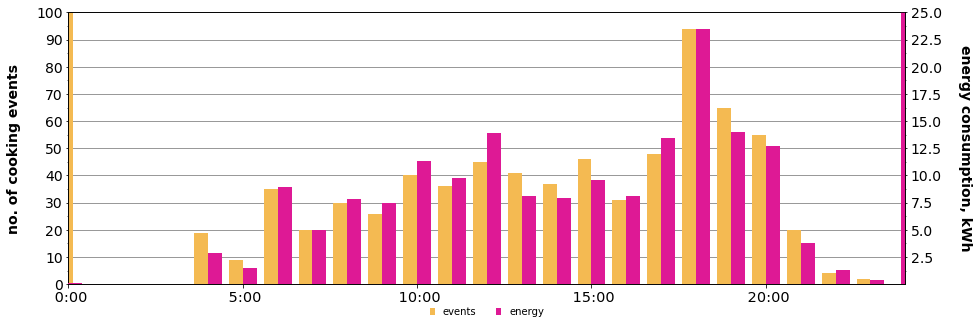

In [23]:
day_plot(df_only_events)

In [24]:
# Simple day plot: 
# df_only_events.groupby([(df_only_events.timestamp.dt.hour)]).agg({'event_energy':'sum'}).event_energy.plot()
# plt.show()

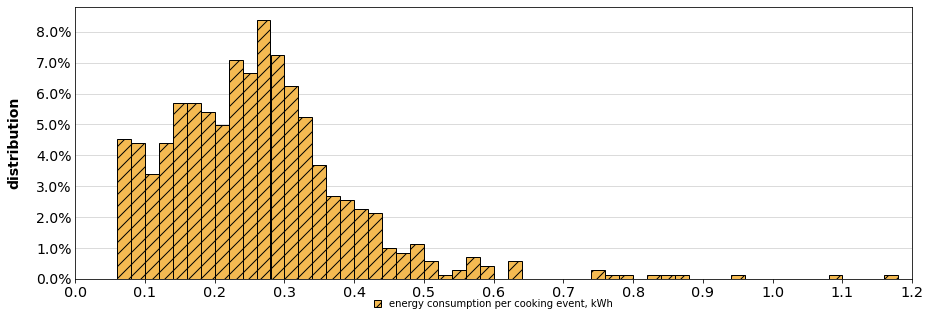

In [25]:
distr_plot(df_only_events)

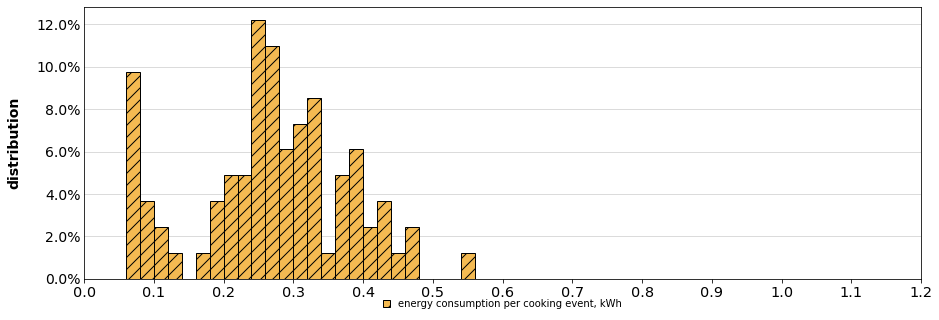

In [26]:
df_only_events_rice = df_only_events[df_only_events.device=='Rice cooker']
distr_plot(df_only_events_rice)

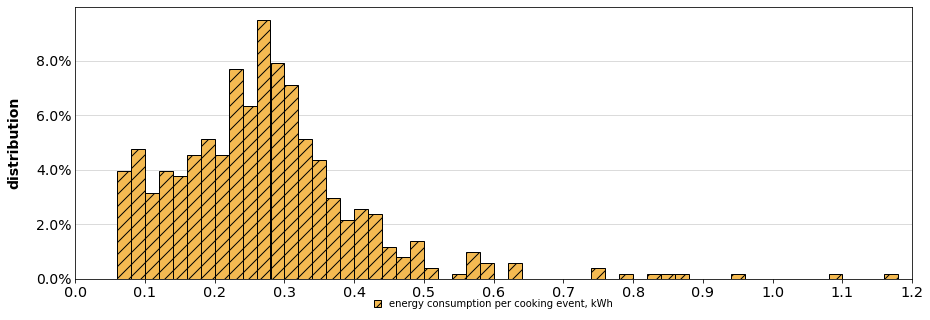

In [27]:
df_only_events_epc = df_only_events[df_only_events.device=='EPC']
distr_plot(df_only_events_epc)

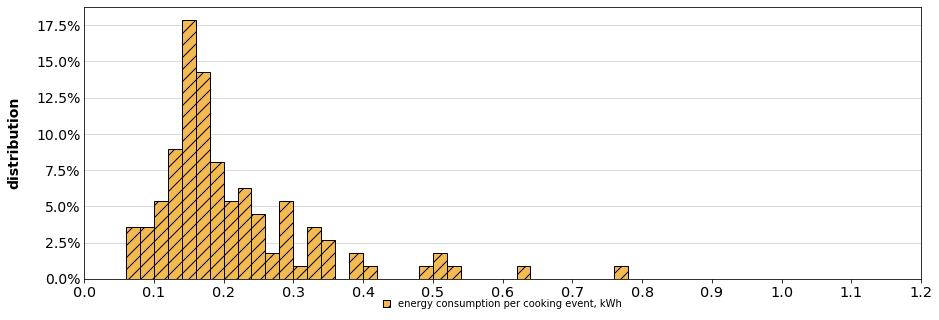

In [28]:
df_only_events_kettle = df_only_events[df_only_events.device=='Kettle']
distr_plot(df_only_events_kettle)

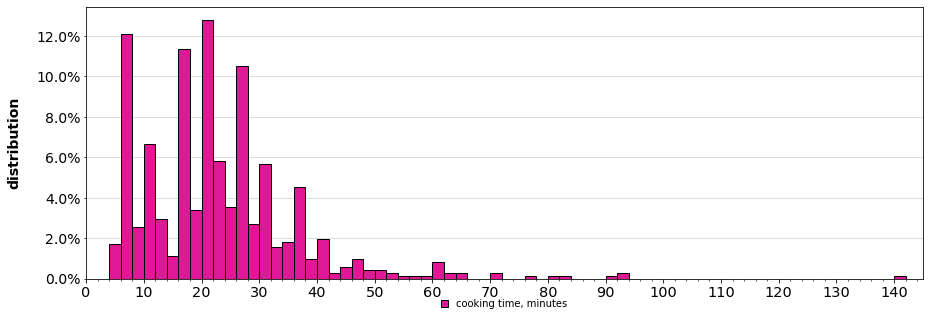

In [29]:
distr_plot_time(df_only_events)

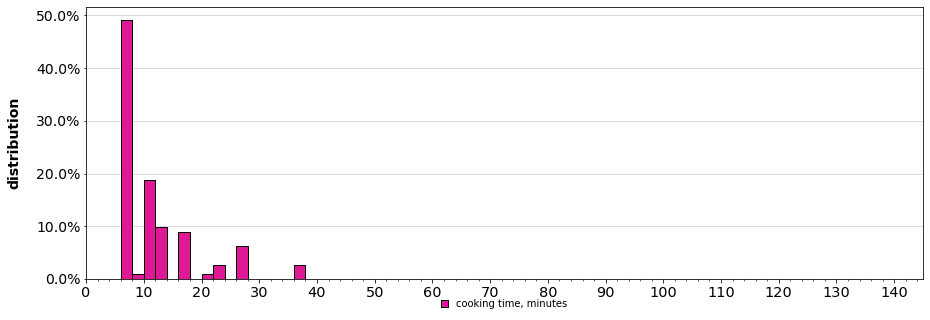

In [30]:
distr_plot_time(df_only_events_kettle)

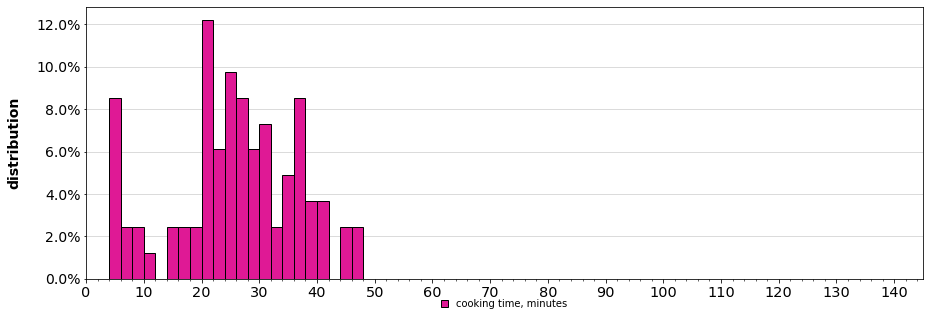

In [31]:
distr_plot_time(df_only_events_rice)

In [32]:
# Change the Width and Height of the following graphs
plt.rcParams['figure.figsize'] = [14, 5]

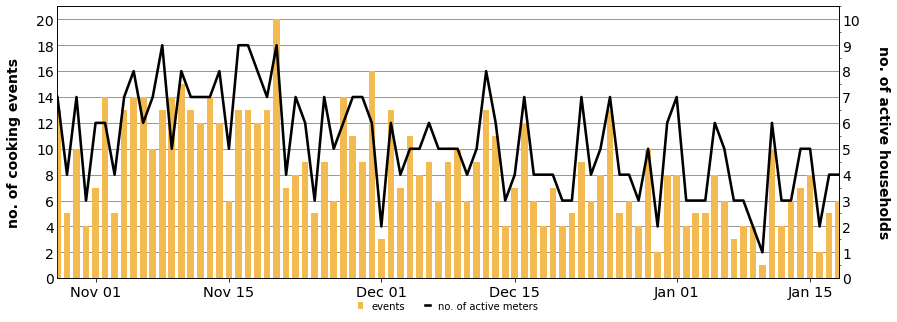

In [33]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
classic_graph(df_day)

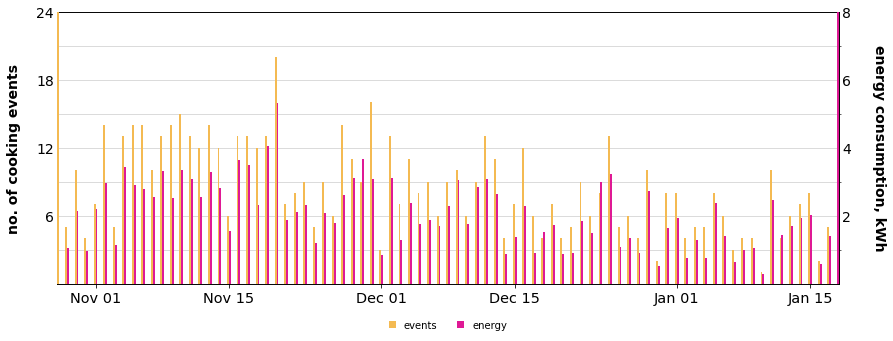

In [34]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
energy_and_time_plot(df_day)

In [35]:
# Simple plots of week and month
'''
df_only_events.groupby((df_only_events.timestamp.dt.isocalendar().week)).agg({'event_energy':'sum'}).event_energy.plot()
plt.title('Energy per week')
plt.show()

df_only_events.groupby(([df_only_events.timestamp.dt.month])).agg({'event_energy':'sum'}).event_energy.plot(marker='o')
plt.title('Energy per month')
plt.show()
'''

"\ndf_only_events.groupby((df_only_events.timestamp.dt.isocalendar().week)).agg({'event_energy':'sum'}).event_energy.plot()\nplt.title('Energy per week')\nplt.show()\n\ndf_only_events.groupby(([df_only_events.timestamp.dt.month])).agg({'event_energy':'sum'}).event_energy.plot(marker='o')\nplt.title('Energy per month')\nplt.show()\n"

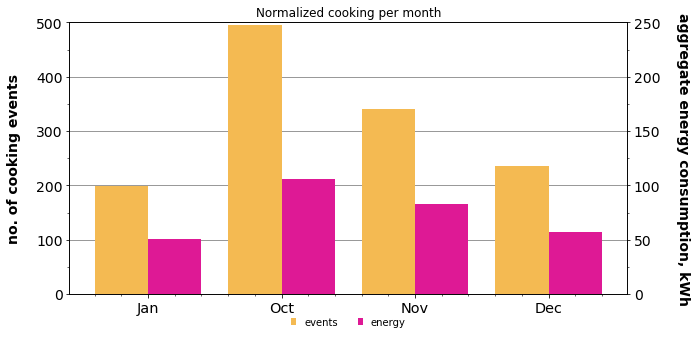

In [36]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

df_month = df_only_events.groupby(df_only_events.timestamp.dt.month).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
norm_month_time = {1:15/31,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:2/31,11:1,12:1}

month_plot(df_month, norm_month_time)

## Quantiles

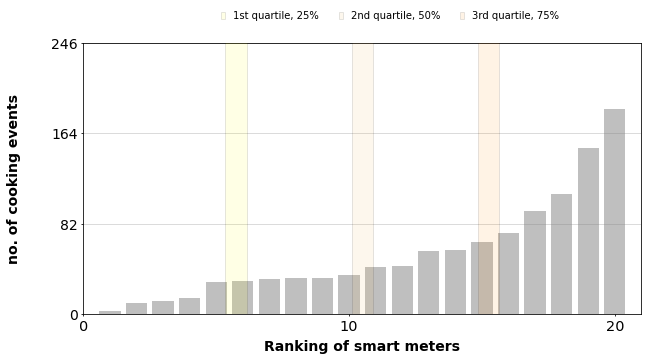

In [37]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, event_basis='yes')

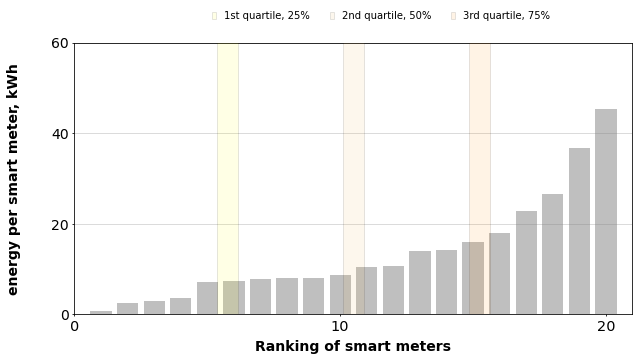

In [38]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, event_basis='no')